In [274]:
# Create the Tree Sequence using the createTree.ipynb notebook

%run "createTree.ipynb"
ts = ts # Pylance false-positive

import pandas as pd

There are  15 trees and  92 nodes, of which 40 are sample nodes


In [275]:
tree = ts.at_index(0)

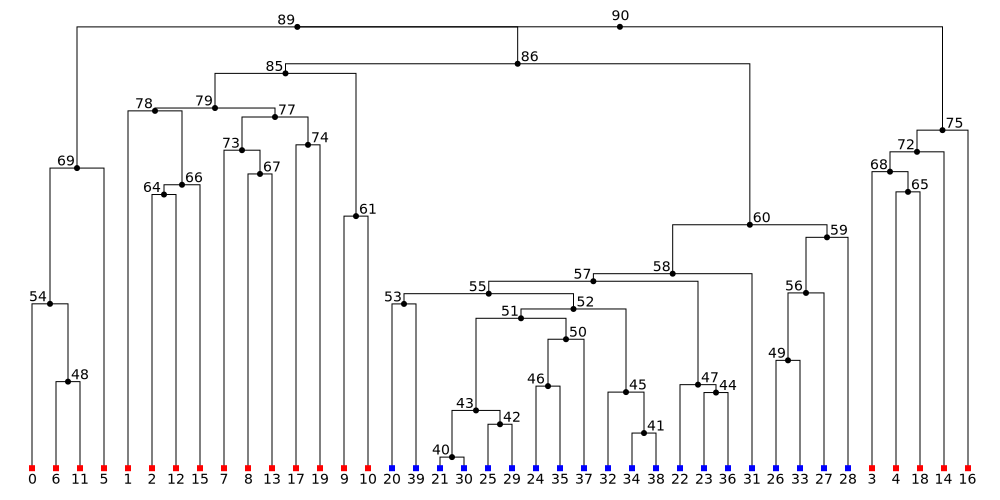

In [276]:
tree.draw(node_colours=node_colours, width=1000, height=500, time_scale='log_time')

In [277]:
pops = pd.DataFrame(columns=['nodes'])

for node in tree.leaves(tree.root):
    current_pop = ts.tables.nodes[node].population
    if current_pop != 2 :
        if (current_pop not in pops.index):
            pops.loc[current_pop] = [[]]
        pops.at[current_pop, 'nodes'].append(node)

pops

,nodes
0,"[16, 14, 3, 4, 18, 5, 0, 6, 11, 9, 10, 7, 8, 1..."
1,"[31, 22, 23, 36, 32, 34, 38, 21, 30, 25, 29, 3..."


In [278]:
pops['mrca'] = pops['nodes'].apply(lambda x: tree.mrca(*x))
pops

,nodes,mrca
0,"[16, 14, 3, 4, 18, 5, 0, 6, 11, 9, 10, 7, 8, 1...",90
1,"[31, 22, 23, 36, 32, 34, 38, 21, 30, 25, 29, 3...",60


In [279]:
pops['toplevelChildren'] = pops['mrca'].apply(lambda x: list(tree.leaves(x)))
pops

,nodes,mrca,toplevelChildren
0,"[16, 14, 3, 4, 18, 5, 0, 6, 11, 9, 10, 7, 8, 1...",90,"[16, 14, 3, 4, 18, 5, 0, 6, 11, 31, 22, 23, 36..."
1,"[31, 22, 23, 36, 32, 34, 38, 21, 30, 25, 29, 3...",60,"[31, 22, 23, 36, 32, 34, 38, 21, 30, 25, 29, 3..."


In [280]:
if (pops['nodes'] == pops['toplevelChildren']).all() :
    print("All nodes are toplevel childen")
    print("Monophyly is preserved")
else :
    print("Not monophyly")

Not monophyly
